<a href="https://colab.research.google.com/github/AndreKlos/AndreKlos/blob/main/Desafios_%2BHora%2Bda%2Bpr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Aula 1

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

In [194]:
#importando o pandas
import pandas as pd

#fazendo a leitura da base de dados

dados = pd.read_csv('/content/drive/MyDrive/Alura/classificacao-aprendendo-classificar-dados-machine-learning/Desafio/churn.csv')

#verificando a existência de valores nulos
dados.drop('id_cliente', axis = 1, inplace = True)
dados.isna().sum()

score_credito          0
pais                   0
sexo_biologico         0
idade                  0
anos_de_cliente        0
saldo                  0
servicos_adquiridos    0
tem_cartao_credito     0
membro_ativo           0
salario_estimado       0
churn                  0
dtype: int64

**Resposta:** Não foi verificado nenhum valor nulo nos dados utilizados

### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [195]:
dados.head()

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [196]:
#importando a biblioteca Plotly
import plotly.express as px

#fazendo o gráfico para as variáveis categóricas.

In [197]:
#pais
px.histogram(dados,x = 'pais',text_auto = True,  color = 'churn', barmode="group")

In [198]:
#sexo biológico
px.histogram(dados, x ="sexo_biologico",text_auto=True, barmode = 'group', color = 'churn')

In [199]:
#serviços adquiridos
px.histogram(dados, x ="servicos_adquiridos",text_auto=True, barmode = 'group', color = 'churn')

In [200]:
#tem cartão de crédito
px.histogram(dados,x = 'tem_cartao_credito', color = 'churn',text_auto=True, barmode = 'group')

In [201]:
#membro ativo
px.histogram(dados,x = 'membro_ativo', color = 'churn',text_auto=True, barmode = 'group')

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [202]:
#para essa análise, usaremos o boxplot
#
px.box(dados, x = 'score_credito', color = 'churn' )

In [203]:
#idade
px.box(dados, x = 'idade', color = 'churn')

In [204]:
#anos de cliente
px.box(dados, x = 'anos_de_cliente', color = 'churn')

In [205]:
#saldo
px.box(dados, x = 'saldo', color = 'churn')

In [206]:
#salario estimado
px.box(dados, x= 'salario_estimado', color = 'churn')

# Aula 2

### Desafio 1:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [207]:
#verificando os dados
dados.head()

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [208]:
#criando a veriavel alvo e as variáveis explicativas
x = dados.drop('churn', axis = 1)
y = dados['churn']

#para confirmar, iremos visualizar as novas variáveis
x


,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52


In [209]:
#visualizando a variável alvo
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

### Desafio 2:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [210]:
#importando as ferramentas de transformação
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

#guardando as colunas que já temos anteriormente
colunas = x.columns

#Construindo a variável que fara a transformação para as variáveis explicativas
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tem_cartao_credito', 'membro_ativo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

#aplicando a transformação em x
x = one_hot.fit_transform(x)

#visualizando os dados transformados que agora são uma array
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__sexo_biologico_Mulher,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


### Desafio 3:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [211]:
#importando a função
from sklearn.preprocessing import LabelEncoder

#criando a variavel da transformação
label_encoder = LabelEncoder()

#fazendo a transformação
y = label_encoder.fit_transform(y)

#visualizando os dados
y

array([1, 0, 1, ..., 1, 1, 0])

# Aula 3

### Desafio 1:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [212]:
# importando a função de divisão
from sklearn.model_selection import train_test_split

#fazendo a separação
x_treino, x_teste, y_treino,y_teste = train_test_split(x,y,stratify = y, random_state = 5)

### Desafio 2:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [213]:
#importando o DummyClassifier
from sklearn.dummy import DummyClassifier

#inicializando o modelo
dummy = DummyClassifier()

#executando o modelo
dummy.fit(x_treino,y_treino)

#fazendo o comparativo com os valores de teste
dummy.score(x_teste,y_teste)

0.7964

### Desafio 3:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [214]:
#importando as funções necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#criando novos nomes para as colunas
nome_colunas = ['Alemanha',
                'Espanha',
                'França',
                'Mulher',
                'credito',
                'idade',
                'anos de cliente',
                'saldo',
                'serviços adquiridos',
                'tem cartão crédito',
                'membro ativo',
		            'salario_estimado']
#criando e aplicando modelo
arvore = DecisionTreeClassifier(max_depth = 4, random_state = 5)
arvore.fit(x_treino, y_treino)

#avaliando o desempenho
arvore.score(x_teste,y_teste)


0.8464

[Text(0.5, 0.9, 'saldo <= 41.5\ngini = 0.324\nsamples = 7500\nvalue = [5972, 1528]\nclass = nao'),
 Text(0.25, 0.7, 'membro ativo <= 2.5\ngini = 0.196\nsamples = 5085\nvalue = [4524, 561]\nclass = nao'),
 Text(0.125, 0.5, 'membro ativo <= 1.5\ngini = 0.174\nsamples = 4974\nvalue = [4495, 479]\nclass = nao'),
 Text(0.0625, 0.3, 'Espanha <= 0.5\ngini = 0.259\nsamples = 2436\nvalue = [2064, 372]\nclass = nao'),
 Text(0.03125, 0.1, 'gini = 0.217\nsamples = 1852\nvalue = [1623, 229]\nclass = nao'),
 Text(0.09375, 0.1, 'gini = 0.37\nsamples = 584\nvalue = [441, 143]\nclass = nao'),
 Text(0.1875, 0.3, 'tem cartão crédito <= 205892.859\ngini = 0.081\nsamples = 2538\nvalue = [2431, 107]\nclass = nao'),
 Text(0.15625, 0.1, 'gini = 0.079\nsamples = 2534\nvalue = [2430, 104]\nclass = nao'),
 Text(0.21875, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = sim'),
 Text(0.375, 0.5, 'tem cartão crédito <= 23194.08\ngini = 0.386\nsamples = 111\nvalue = [29, 82]\nclass = sim'),
 Text(0.3125, 0.3,

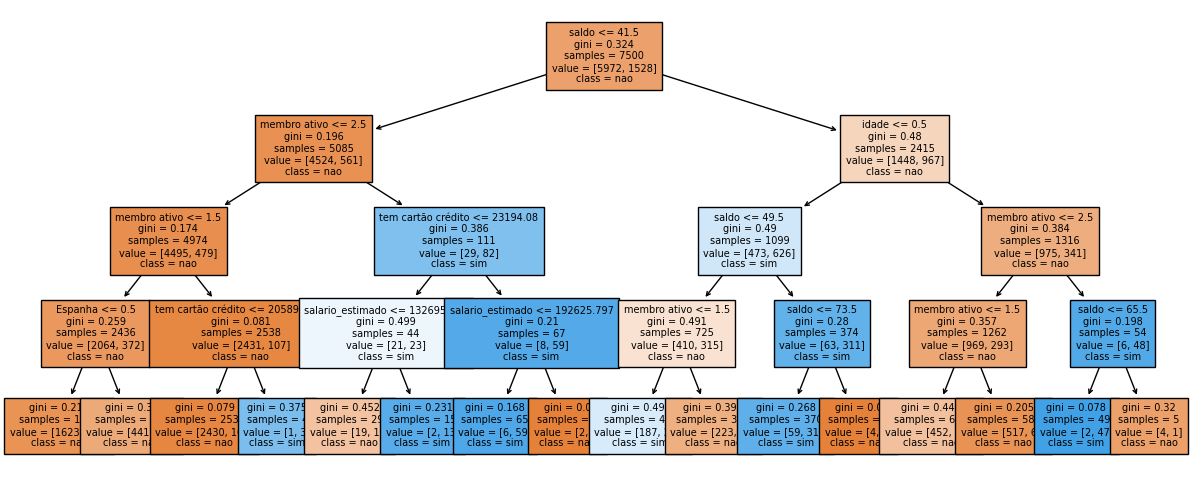

In [215]:
#visualizando a arvore
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7,
           feature_names = nome_colunas)


# Aula 4

### Desafio 1:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [216]:
#importando a função para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

#fazendo a transformação
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,0.0,1.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,1.0,0.0,0.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,1.0,0.0,0.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,1.0,0.0,1.0,0.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,1.0,0.0,1.0,0.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,1.0,0.0,1.0,0.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,1.0,0.0,0.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


### Desafio 2:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [217]:
#importando o algoritimo
from sklearn.neighbors import KNeighborsClassifier

#inicializando o modelo
knn = KNeighborsClassifier()
#ajustando o modelo aos dados normalizados
knn.fit(x_treino_normalizado,y_treino)
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,0.0,1.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,1.0,0.0,0.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,1.0,0.0,0.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,1.0,0.0,1.0,0.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,1.0,0.0,1.0,0.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,1.0,0.0,1.0,0.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,1.0,0.0,0.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


In [218]:
#transformando os dados de teste
x_teste_normalizado = normalizacao.fit_transform(x_teste)

#fazendo o teste do algoritimo KNN
knn.score(x_teste_normalizado,y_teste)

0.8144

### Desafio 3:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [219]:
#apresentando o resultado de cada modelo
print(f'Acurácia dummy: {dummy.score(x_teste,y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste,y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado,y_teste)}')

Acurácia dummy: 0.7964
Acurácia Árvore: 0.8464
Acurácia KNN: 0.8144


In [220]:
#salvando o OneHotEncoder usado no modelo de árvore
import pickle

with open('modelo_onehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)



In [221]:
#armazenando o modelo de árvore de decisão
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore,arquivo)

### Desafio 4:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```


In [222]:
#inserindo os novos dados
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})


#atribuindo uma variavel aos modelos baixados
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')


#fazendo a transformação com o OneHotEncoder e utilizando o modelo de arvore
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)



ValueError: ignored

In [223]:
from sklearn.preprocessing import OneHotEncoder

# Suponha que você tenha um encoder treinado
encoder = modelo_one_hot  # Seu encoder treinado

# Seus novos dados
novos_dados = ...  # Seus novos dados

# Lide com categorias desconhecidas
try:
    novos_dados_transformados = encoder.transform(novos_dados)
except ValueError as e:
    print(f"Erro: {e}")
    print("Lidando com categorias desconhecidas...")
    novos_dados = encoder.handle_unknown(novos_dados)
    novos_dados_transformados = encoder.transform(novos_dados)

# Agora, você pode usar os dados transformados no seu modelo


Erro: Expected 2D array, got scalar array instead:
array=Ellipsis.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
Lidando com categorias desconhecidas...


AttributeError: ignored